In [6]:
# Preparation with environment for notebook
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

# Allow inline matplotlib figures appear in the notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 10.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Allow auto-reload of external modules 
%load_ext autoreload
%autoreload 2

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## Preprocessing and Loading of dataset

In [109]:
from NeuralNetwork.data_utils import *
mnistDir = "NeuralNetwork/MnistData"
datasets = getMnistDataSets(mnistDir,valSize=5000)
print datasets

{'test': <NeuralNetwork.data_utils.DataSet instance at 0x103ac6908>, 'train': <NeuralNetwork.data_utils.DataSet instance at 0x103ac6488>, 'validation': <NeuralNetwork.data_utils.DataSet instance at 0x1077211b8>}


In [110]:
train = datasets['train']
Xtr, Ytr = train.images, train.labels
print Xtr.shape, Xtr.dtype
print Ytr.shape, Ytr.dtype
print train.imgNum

for i in range(1):
    train.nextBatch(100)


(784, 55000) float64
(55000,) int64
55000


## Test Network

In [166]:
from NeuralNetwork.neural_network import *
from NeuralNetwork.data_utils import *
import time


mnistDir = "NeuralNetwork/MnistData"
datasets = getMnistDataSets(mnistDir,valSize=5000)
train = datasets['train']
test = datasets['test']
Xtr, Ytr = train.images, train.labels
Xte, Yte = test.images, test.labels

# Initialize Parameters
hiddenLayer = [300]
classNum = 10 
epsilon= 0.0001 

weightConsWeight = 10
activConsWeight = 15
iterOutNum = 20
iterInNum = 20
batchSize = 100
hasLambda = False
calLoss = True


network = NeuralNetwork(Xtr, Ytr, classNum, hiddenLayer, epsilon)

"""
Input:
weightConsWeight, activConsWeight
iterNum:    iteration to perform Admm updates
hasLambda:  whether include Lambda update
lossType:   one of {'hinge', 'msq', 'smx'}, default is 'smx'
minMethod:  if lossType is 'smx', the method to minimize the zLastUpdate has to be specified 
            (for it's not in closed form), 
            it can be one of {'prox','gd','newton'}, default is 'prox';
tau, ite:   if lossType is 'smx', 
            the step size and iteration of gradient descent/proximal gradient have to be specified, 
            default: tau=0.01, ite=25; 
"""

# Train 
tic = time.time()
%prun network.train(train, weightConsWeight, activConsWeight, iterOutNum, iterInNum, hasLambda, calLoss=calLoss, batchSize=batchSize, lossType='smx', minMethod='newton', tau=1, ite=10, initW=None )
    
toc = time.time()
print 'Total training time: %fs' % (toc - tic)

# Predictf
Ypred,z = network.predict(Xte)
print ',,,',Ypred.shape
print 'Prediction accuracy: %f' %np.mean(Ypred == Yte)


[]   [[]]   [[], []]
Initializing a neural network with :  1  hidden layers, hidden layer dimension: [300]
0 100
0 : 0.0559461116791
1 : 0.050938129425
2 : 0.0391209125519
3 : 0.0435490608215
4 : 0.043438911438
5 : 0.0459439754486
6 : 0.0399570465088
7 : 0.0371241569519
8 : 0.0363738536835
9 : 0.0431180000305
10 : 0.0416371822357
11 : 0.0448281764984
12 : 0.0418920516968
13 : 0.0416061878204
14 : 0.0416581630707
15 : 0.0435860157013
16 : 0.0677900314331
17 : 0.0426890850067
18 : 0.0410041809082
19 : 0.0455060005188
100 200
0.426935141459
0 : 0.0517880916595
1 : 0.0434050559998
2 : 0.0412981510162
3 : 0.041983127594
4 : 0.0396659374237
5 : 0.039703130722
6 : 0.0484278202057
7 : 0.053111076355
8 : 0.0490570068359
9 : 0.0382318496704
10 : 0.037024974823
11 : 0.0398569107056
12 : 0.0419869422913
13 : 0.0532259941101
14 : 0.0380280017853
15 : 0.0407731533051
16 : 0.0458340644836
17 : 0.0504319667816
18 : 0.0398619174957
19 : 0.0570158958435
200 300
0.433439849324
0 : 0.0534520149231
1 : 0.0

## Visualisation

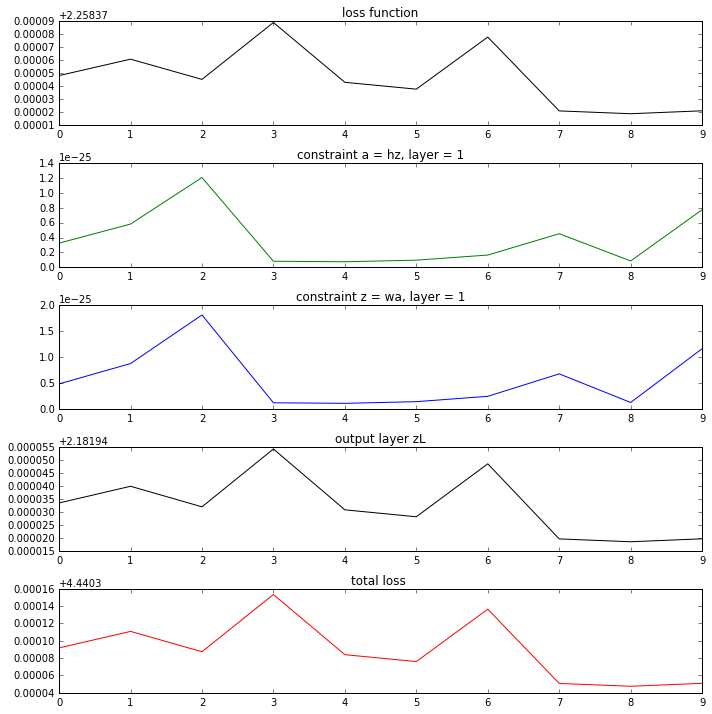

In [112]:
L = len(hiddenLayer)
if calLoss:
    fig = plt.figure()
    gs = gridspec.GridSpec(5,L)

    dataLoss = fig.add_subplot(gs[0,:])
    dataLoss.set_title('loss function')
    dataLoss.plot(network.dataLoss, 'k-')

    for l in range(0,L):
        aloss = fig.add_subplot(gs[1,l])
        aloss.set_title('constraint a = hz, layer = %d' % (l+1))
        aloss.plot(network.aConstrLoss[l], 'g-')

        zloss = fig.add_subplot(gs[2,l])
        zloss.set_title('constraint z = wa, layer = %d' % (l+1))
        zloss.plot(network.zConstrLoss[l], 'b-')

#             lag = fig.add_subplot(gs[3,:])
#             lag.set_title('lagrange term')
#             lag.plot(network.lagraLoss, 'r-')


    zLLoss = fig.add_subplot(gs[3,:])
    zLLoss.set_title('output layer zL')
    zLLoss.plot(network.zConstrLoss[L], 'k-')

    total = fig.add_subplot(gs[4,:])
    total.set_title('total loss ')
    total.plot(network.totalLoss, 'r-')

    plt.tight_layout()
    plt.show()